In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime

In [2]:
geo_loc = pd.read_csv(r"C:\Users\Anonymous\Downloads\Python Foundation End to End Case Study E-Commerce Analytics Project\5. Python Foundation End to End Case Study_E-Commerce Analytics Project\GEO_LOCATION.csv")
order_payment = pd.read_csv(r"C:\Users\Anonymous\Downloads\Python Foundation End to End Case Study E-Commerce Analytics Project\5. Python Foundation End to End Case Study_E-Commerce Analytics Project\ORDER_PAYMENTS.csv")
order_review_ratings = pd.read_csv(r"C:\Users\Anonymous\Downloads\Python Foundation End to End Case Study E-Commerce Analytics Project\5. Python Foundation End to End Case Study_E-Commerce Analytics Project\ORDER_REVIEW_RATINGS.csv")
orders = pd.read_csv(r"C:\Users\Anonymous\Downloads\Python Foundation End to End Case Study E-Commerce Analytics Project\5. Python Foundation End to End Case Study_E-Commerce Analytics Project\ORDERS.csv")
products = pd.read_csv(r"C:\Users\Anonymous\Downloads\Python Foundation End to End Case Study E-Commerce Analytics Project\5. Python Foundation End to End Case Study_E-Commerce Analytics Project\PRODUCTS.csv")
sellers = pd.read_csv(r"C:\Users\Anonymous\Downloads\Python Foundation End to End Case Study E-Commerce Analytics Project\5. Python Foundation End to End Case Study_E-Commerce Analytics Project\SELLERS.csv")
order_items = pd.read_csv(r"C:\Users\Anonymous\Downloads\Python Foundation End to End Case Study E-Commerce Analytics Project\5. Python Foundation End to End Case Study_E-Commerce Analytics Project\ORDER_ITEMS.csv")
customers = pd.read_csv(r"C:\Users\Anonymous\Downloads\Python Foundation End to End Case Study E-Commerce Analytics Project\5. Python Foundation End to End Case Study_E-Commerce Analytics Project\CUSTOMERS.csv")

Checking for null values in all the tables

In [3]:
geo_loc.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [4]:
order_payment.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [5]:
order_review_ratings.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [6]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [7]:
products.isna().sum()

product_id                      0
product_category_name         623
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [8]:
sellers.isna().sum()

seller_id                  0
seller_zip_code_prefix     0
seller_city               57
seller_state              57
dtype: int64

In [9]:
order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [10]:
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

There are null values present in three tables , namely orders,products and sellers . Null value treatment will be done in next steps.

Null value treatment

In [11]:
## null-values in 'order_approved_at' can be filled by 'order_purchase_timestamp' and null-values in 'order_delivered_customer_date' can be filled by 'order_estimated_delivery_date' 
## and null values in 'order_delivered_carrier_date' can be filled by 'order_approved_at date'.
orders['order_approved_at'].fillna(orders['order_purchase_timestamp'],inplace = True)
orders['order_delivered_carrier_date'].fillna(orders['order_approved_at'],inplace = True)
orders['order_delivered_customer_date'].fillna(orders['order_estimated_delivery_date'],inplace = True)

In [12]:
products['product_category_name'].fillna(products['product_category_name'].mode()[0],inplace=True)
products['product_name_lenght'].fillna(products['product_name_lenght'].median(),inplace=True)
products['product_description_lenght'].fillna(products['product_description_lenght'].median(),inplace=True)
products['product_photos_qty'].fillna(products['product_photos_qty'].mode()[0],inplace=True)
products['product_weight_g'].fillna(products['product_weight_g'].median(),inplace=True)
products['product_length_cm'].fillna(products['product_length_cm'].median(),inplace=True)
products['product_height_cm'].fillna(products['product_height_cm'].median(),inplace=True)
products['product_width_cm'].fillna(products['product_width_cm'].median(),inplace=True)

In [13]:
sellers['seller_city'].fillna(sellers['seller_city'].mode()[0],inplace = True)
sellers['seller_state'].fillna(sellers['seller_state'].mode()[0],inplace = True)

Changing the datatypes of the required columns

In [14]:
order_items['shipping_limit_date'] = pd.to_datetime(order_items['shipping_limit_date'],format = 'mixed')
order_review_ratings['review_creation_date'] = pd.to_datetime(order_review_ratings['review_creation_date'] , format = 'mixed')
order_review_ratings['review_answer_timestamp'] = pd.to_datetime(order_review_ratings['review_answer_timestamp'] , format = 'mixed')
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'] , format = 'mixed')
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'] , format = 'mixed')
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'] , format = 'mixed')
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'] , format = 'mixed')
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'] , format = 'mixed')

Now, merging all the tables into one for the sake of simplicity

In [15]:
merged_dataset = pd.merge(orders , order_items , on = 'order_id' )
merged_dataset = pd.merge(merged_dataset , products , on = 'product_id' )
merged_dataset = pd.merge(merged_dataset , sellers , on = 'seller_id')
merged_dataset = pd.merge(merged_dataset , customers , on = 'customer_id')
merged_dataset = pd.merge(merged_dataset , order_review_ratings , on = 'order_id')
merged_dataset = pd.merge(merged_dataset , order_payment , on = 'order_id')
merged_dataset = pd.merge(merged_dataset , geo_loc , left_on = 'customer_zip_code_prefix' , right_on = 'geolocation_zip_code_prefix')
merged_dataset = pd.merge(merged_dataset , geo_loc ,  left_on = 'seller_zip_code_prefix',right_on='geolocation_zip_code_prefix')

In [16]:
merged_dataset.rename(columns = {'geolocation_zip_code_prefix_x' : 'geolocation_zip_code_prefix_cust', 
                             'geolocation_lat_x' : 'geolocation_lat_cust',
                           'geolocation_lng_x': 'geolocation_lng_cust',
                            'geolocation_city_x': 'geolocation_city_cust',
                            'geolocation_state_x': 'geolocation_state_cust',
                            'geolocation_zip_code_prefix_y': 'geolocation_zip_code_prefix_seller',
                            'geolocation_lat_y': 'geolocation_lat_seller',
                            'geolocation_lng_y': 'geolocation_lng_seller',
                            'geolocation_city_y': 'geolocation_city_seller',
                            'geolocation_state_y': 'geolocation_state_seller'}, inplace = True)

### 1. Perform Detailed exploratory analysis 
### a. Define & calculate high level metrics like (Total Revenue, Total quantity, Total products, Total categories, Total sellers, Total locations, Total channels, Total payment methods etc…)  

In [17]:
print('Total Revenue =','₹',merged_dataset.payment_value.sum())
print('Total quantity =',merged_dataset.order_item_id.sum())
print('Total Products =',merged_dataset.product_id.nunique())
print('Total Sellers =',merged_dataset.seller_id.nunique())
print('Total delivery locations =',merged_dataset.geolocation_city_cust.nunique())
print('Total seller location =',merged_dataset.geolocation_city_seller.nunique())
print('Total payment channels =',merged_dataset.payment_type.nunique())
print('Total delivery charges =',merged_dataset.freight_value.sum())
print('Highest rating received by any seller =',merged_dataset.review_score.max())
print('Lowest rating received by any seller =',merged_dataset.review_score.min())
print('Average rating of all the customers combined =',merged_dataset.review_score.mean())

Total Revenue = ₹ 20321313.689999998
Total quantity = 140890
Total Products = 32842
Total Sellers = 3088
Total delivery locations = 3784
Total seller location = 529
Total payment channels = 4
Total delivery charges = 2357726.3500000006
Highest rating received by any seller = 5
Lowest rating received by any seller = 1
Average rating of all the customers combined = 4.014439329335621


### b. Understanding how many new customers acquired every month 

In [18]:
merged_dataset['pur_month'] = merged_dataset.order_purchase_timestamp.dt.strftime('%B')
merged_dataset['pur_year'] = merged_dataset.order_purchase_timestamp.dt.year
merged_dataset['month_and_year']=merged_dataset['order_purchase_timestamp'].apply(lambda x : pd.Timestamp.strftime(x,format='%Y %B'))

In [19]:
ques1b = merged_dataset.drop_duplicates(subset = ['customer_unique_id'],keep = 'first').groupby(by='month_and_year')['customer_unique_id'].nunique().reset_index()

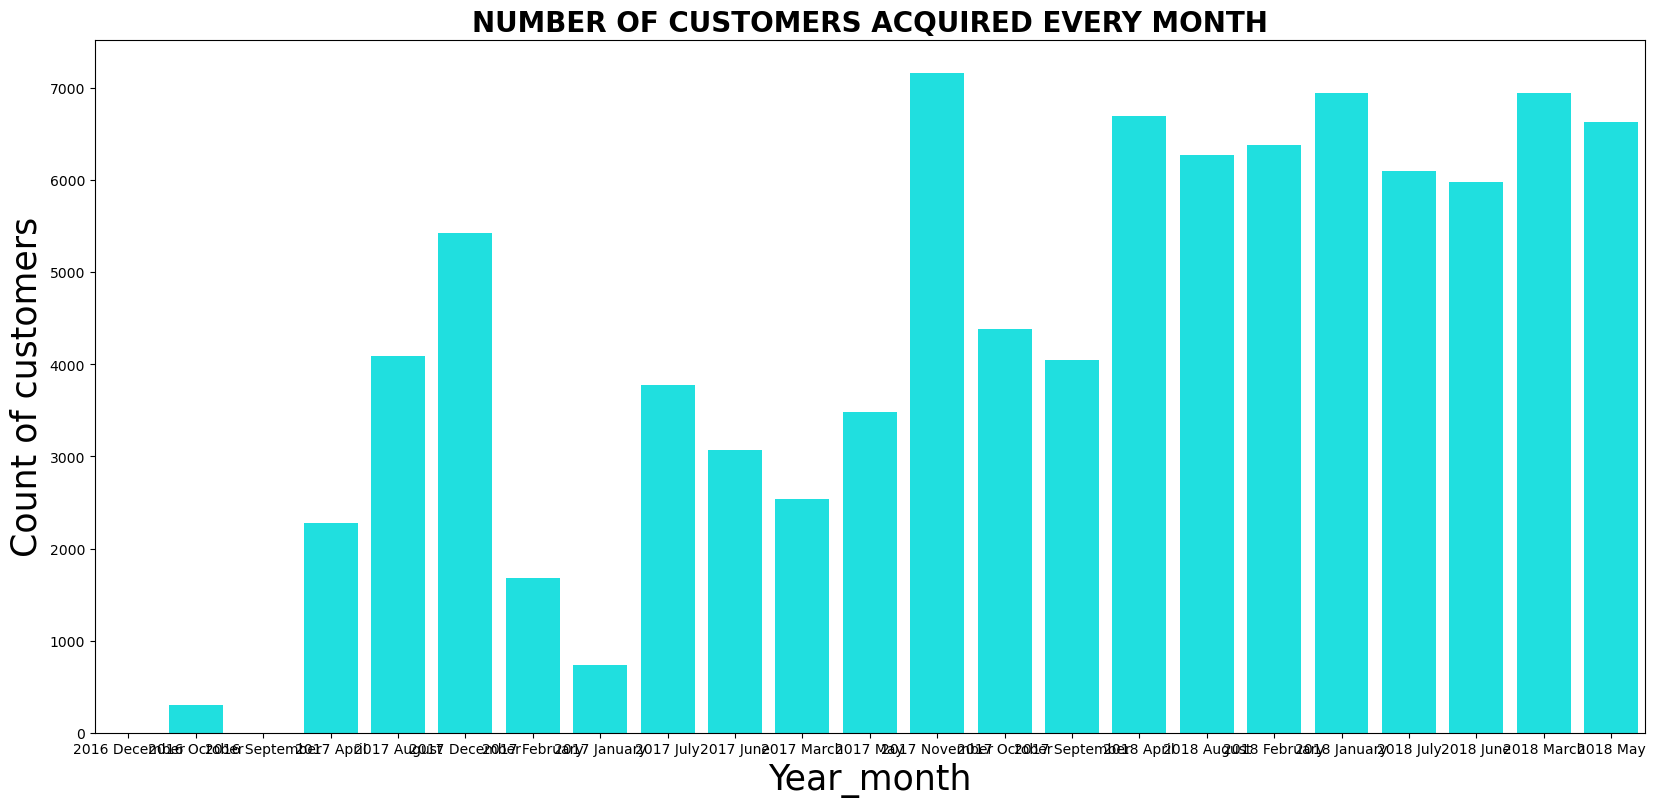

In [20]:
plt.figure(figsize=(20,9))
fig=sns.barplot(ques1b, x='month_and_year', y='customer_unique_id', color='aqua' )
plt.title('NUMBER OF CUSTOMERS ACQUIRED EVERY MONTH', fontweight='bold',fontsize=20)
plt.xlabel('Year_month',fontsize=25)
plt.ylabel('Count of customers',fontsize=25)
plt.show()

### c. Understand the retention of customers on month on month basis

In [21]:
ques1c = merged_dataset.loc[:,['customer_unique_id', 'month_and_year']]
ques1c.drop_duplicates('customer_unique_id',inplace = True)
pd.pivot_table(ques1c , index = 'month_and_year' , values = 'customer_unique_id' , aggfunc = 'count')

,customer_unique_id
month_and_year,
2016 December,1
2016 October,298
2016 September,2
2017 April,2283
2017 August,4090
2017 December,5429
2017 February,1680
2017 January,736
2017 July,3776


In [22]:
pd.pivot_table(merged_dataset,index='customer_unique_id',columns=merged_dataset.order_purchase_timestamp.dt.month_name(),values='order_id',aggfunc='count',fill_value=0)

order_purchase_timestamp,April,August,December,February,January,July,June,March,May,November,October,September
customer_unique_id,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,0,0,0,0,0,0,0,0,1,0,0,0
0000b849f77a49e4a4ce2b2a4ca5be3f,0,0,0,0,0,0,0,0,1,0,0,0
0000f46a3911fa3c0805444483337064,0,0,0,0,0,0,0,1,0,0,0,0
0000f6ccb0745a6a4b88665a16c9f078,0,0,0,0,0,0,0,0,0,0,1,0
0004aac84e0df4da2b147fca70cf8255,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,0,0,0,0,0,0,2,0,0,0,0,0
fffea47cd6d3cc0a88bd621562a9d061,0,0,1,0,0,0,0,0,0,0,0,0
ffff371b4d645b6ecea244b27531430a,0,0,0,1,0,0,0,0,0,0,0,0


### d. How the revenues from existing/new customers on month on month basis 

In [23]:
cca = merged_dataset.groupby('customer_unique_id')['customer_unique_id'].count()

In [24]:
# Created a list called new customers ,and in the varible we saved the unique_customer_id's of those customers who has single count
new_customers = cca[cca == 1].index.tolist()

In [25]:
# Filtered the data with the help of list we created earlier
new_customersd = merged_dataset[merged_dataset.customer_unique_id.isin(new_customers)]

In [26]:
# Grouped the year and month columns with the sum of payment values for each month.
new_customers_data =new_customersd.groupby(['pur_year','pur_month'])['payment_value'].sum().reset_index()

In [27]:
# Here we used pd.categorical for sorting th month column in chronological order
new_customers_data['pur_month'] = pd.Categorical(new_customers_data['pur_month'],categories = [ 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],ordered = True) 

In [28]:
# Sorted the data set
new_customers_data =new_customers_data.sort_values(by = ['pur_year','pur_month'])

In [29]:
# converted the year and month columns datatype to string for concatenating the columns for plotting
new_customers_data.pur_year = new_customers_data.pur_year.astype('str')

new_customers_data.pur_month = new_customers_data.pur_month.astype('str') 

In [30]:
# Concatenated the columns year and month.
new_customers_data['pur_year-month'] = new_customers_data['pur_year'] + ' ' + new_customers_data['pur_month']

In [31]:
new_customers_data

,pur_year,pur_month,payment_value,pur_year-month
1,2016,September,75.06,2016 September
0,2016,October,45385.05,2016 October
6,2017,January,102281.69,2017 January
5,2017,February,228803.00,2017 February
9,2017,March,341309.57,2017 March
2,2017,April,309735.26,2017 April
10,2017,May,445188.94,2017 May
8,2017,June,399693.73,2017 June
7,2017,July,434622.89,2017 July
3,2017,August,504376.81,2017 August


In [32]:
# Here we created a list of those unique customer id's whose counts are more than 1 and than saved them in the list
existing_customers = cca[cca > 1].index.tolist()

In [33]:
# Filtered the data for existing customers with the help of existing_customers list we created earlier.
existing_customersd = merged_dataset[merged_dataset.customer_unique_id.isin(existing_customers)]

In [34]:
# Grouped the year and month columns with the sum of payment values for each month.
existing_customers_data = existing_customersd.groupby(['pur_year','pur_month'])['payment_value'].sum().reset_index()

In [35]:
# Here we used pd.categorical for sorting th month column in chronological order
existing_customers_data['pur_month'] = pd.Categorical(existing_customers_data['pur_month'],categories = [ 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],ordered = True) 

In [36]:
# Sorted the data set
existing_customers_data = existing_customers_data.sort_values(by = ['pur_year','pur_month'])

In [37]:
existing_customers_data.pur_year = existing_customers_data.pur_year.astype('str')
existing_customers_data.pur_month = existing_customers_data.pur_month.astype('str') 

In [38]:
existing_customers_data['pur_year'] = existing_customers_data['pur_year'].reset_index(drop=True)

In [39]:
existing_customers_data['pur_year-month'] = existing_customers_data['pur_year'] + ' ' + existing_customers_data['pur_month']

In [40]:
existing_customers_data

,pur_year,pur_month,payment_value,pur_year-month
2,2016,September,272.46,2016 September
1,2016,October,29388.49,2016 October
0,2016,December,19.62,2016 December
7,2017,January,87288.33,2017 January
6,2017,February,117411.31,2017 February
10,2017,March,187211.94,2017 March
3,2017,April,195800.72,2017 April
11,2017,May,282158.88,2017 May
9,2017,June,199511.07,2017 June
8,2017,July,301994.86,2017 July


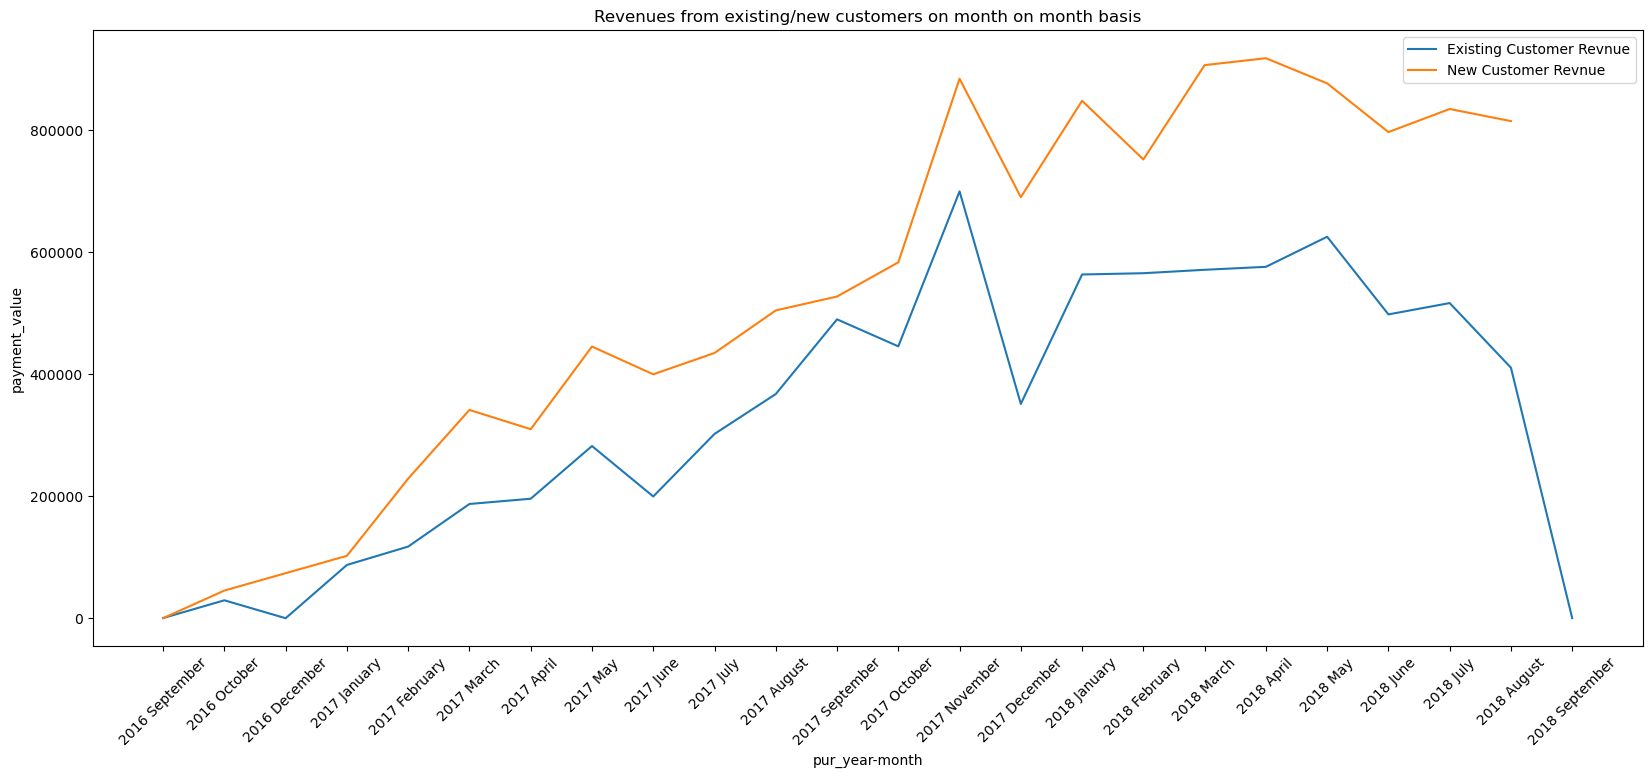

In [41]:
# Plotted revenue of both existing and new customer in the same linechart
plt.figure(figsize=(20,8))
sns.lineplot(data = existing_customers_data, x = existing_customers_data['pur_year-month'], y = existing_customers_data.payment_value,label ='Existing Customer Revnue' )
sns.lineplot(data=new_customers_data, x='pur_year-month', y='payment_value',label = 'New Customer Revnue')

plt.xticks(rotation=45)
plt.title(label = 'Revenues from existing/new customers on month on month basis')
plt.show()

### e. Understand the trends/seasonality of sales, quantity by category, location, month, week, day, time, channel, payment method etc… 

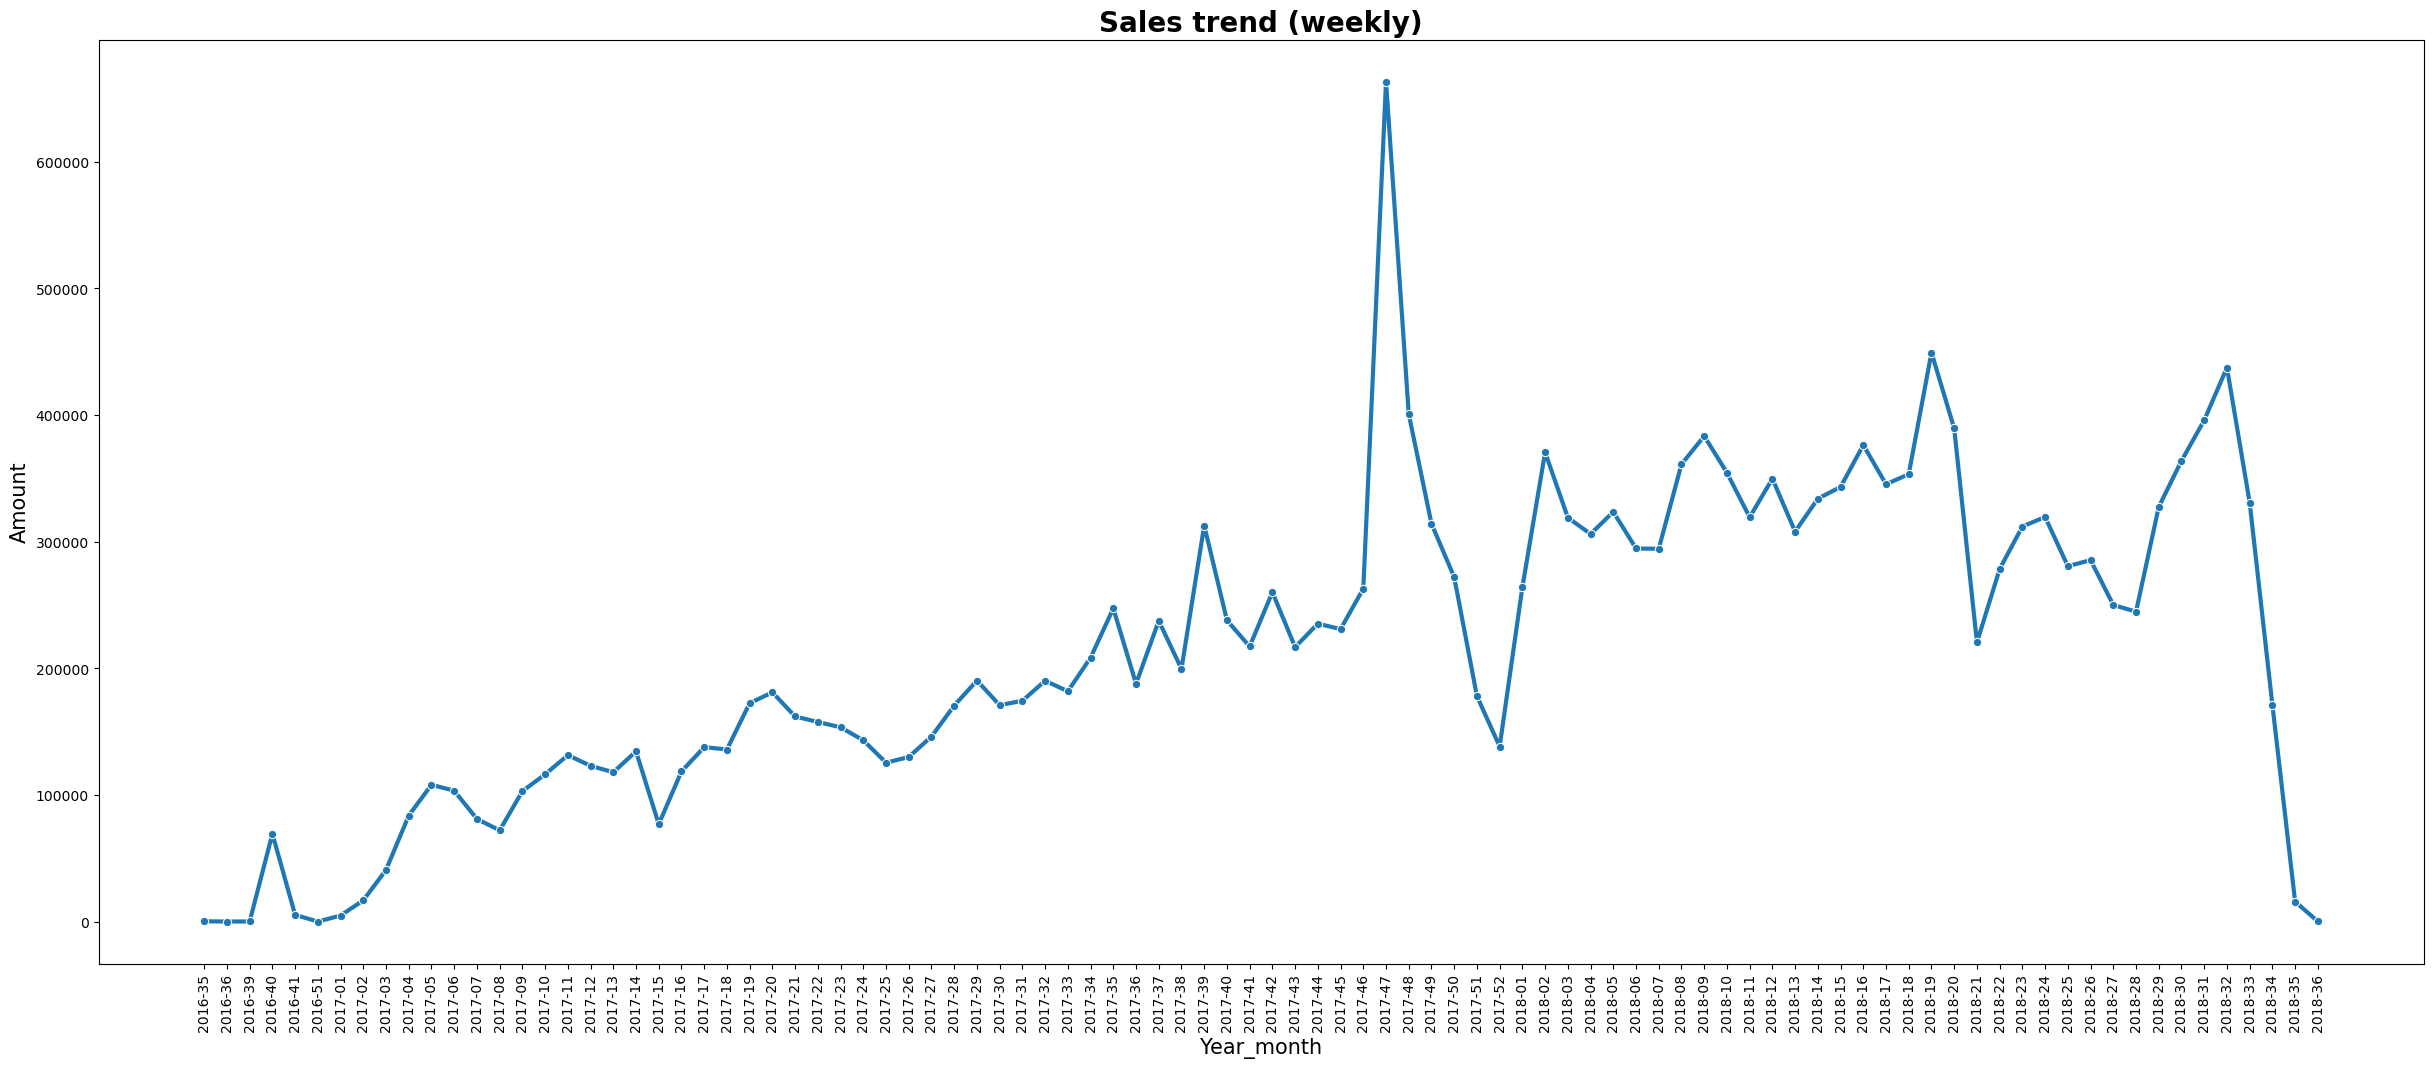

In [42]:
#creating a new column to extract the week number from the order purchase date
merged_dataset['year_week'] = merged_dataset.order_purchase_timestamp.apply( lambda x: pd.Timestamp.strftime(x, format= '%Y-%V'))

#Trend of sale by week

sale_by_week = pd.pivot_table(merged_dataset , index = 'year_week' , aggfunc = 'sum' , values = 'payment_value')
plt.figure(figsize=(30,12))
sns.lineplot(sale_by_week, x='year_week', y='payment_value', marker="o",linewidth=3)
plt.title('Sales trend (weekly)', fontweight='bold',fontsize=20)
plt.xlabel('Year_month',fontsize=15)
plt.ylabel('Amount',fontsize=15)
plt.xticks(rotation=90)
plt.show()

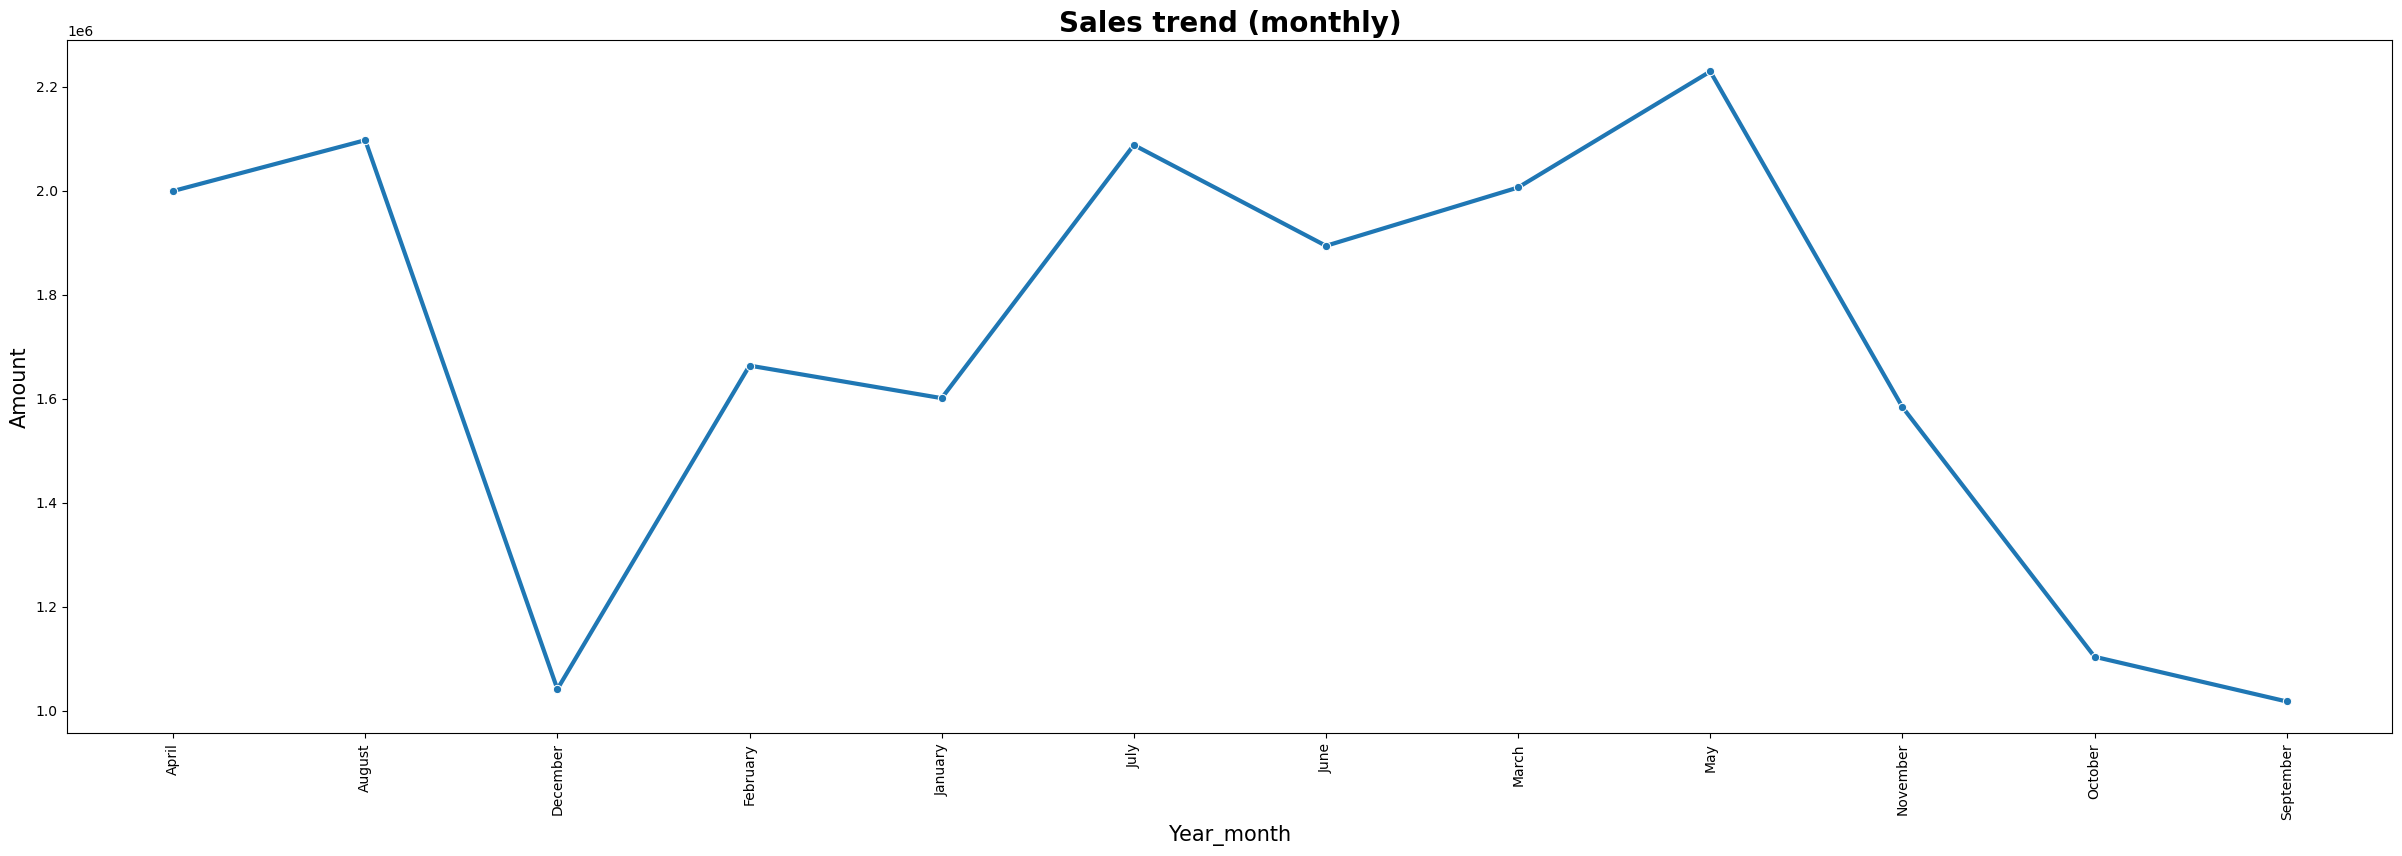

In [43]:
#trend of sales by month
sale_by_month = pd.pivot_table(merged_dataset , index = 'pur_month' , values = 'payment_value' , aggfunc = 'sum')

plt.figure(figsize=(30,9))
sns.lineplot(sale_by_month, x='pur_month', y='payment_value', marker="o",linewidth=3)
plt.title('Sales trend (monthly)', fontweight='bold',fontsize=20)
plt.xlabel('Year_month',fontsize=15)
plt.ylabel('Amount',fontsize=15)
plt.xticks(rotation=90)
plt.show()

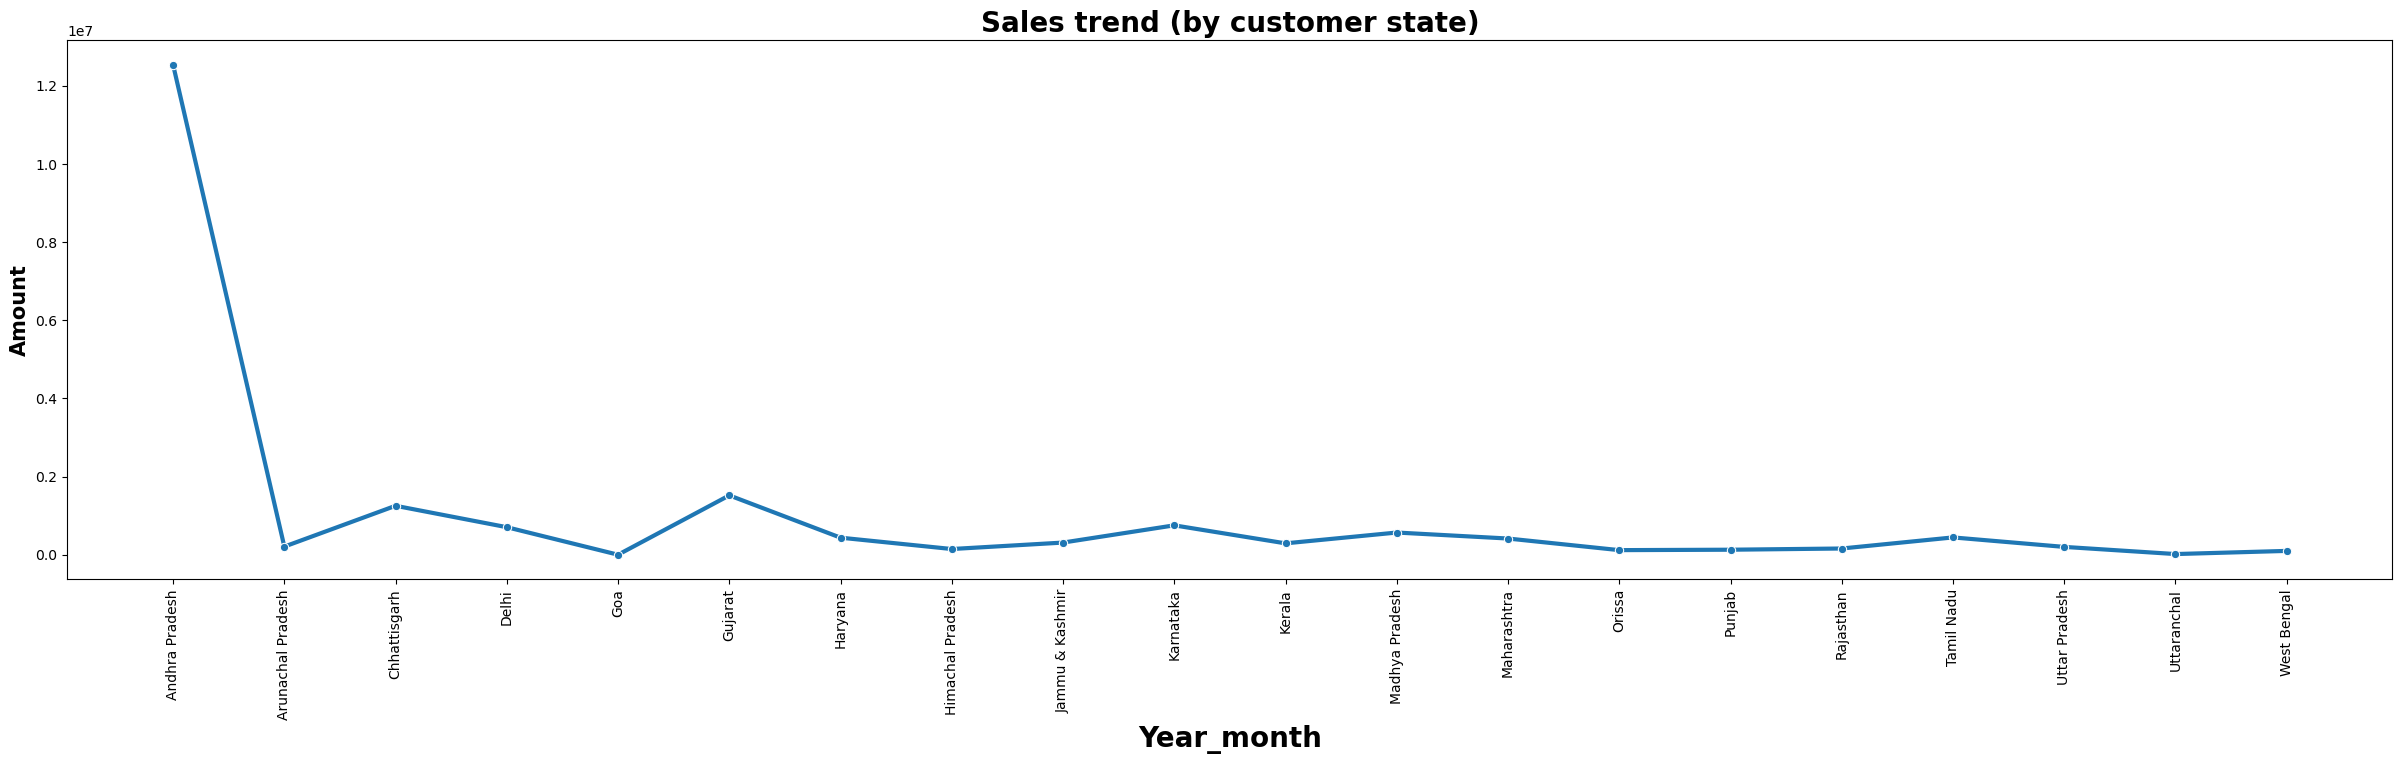

In [44]:
# sales trend by state
sales_by_state  = merged_dataset.groupby('geolocation_state_cust')['payment_value'].sum().reset_index()
plt.figure(figsize=(30,7))
sns.lineplot(sales_by_state, x='geolocation_state_cust', y='payment_value', marker="o",linewidth=3)
plt.title('Sales trend (by customer state)', fontweight='bold',fontsize=20)
plt.xlabel('Year_month',fontweight='bold',fontsize=20)
plt.ylabel('Amount',fontweight='bold',fontsize=15)
plt.xticks(rotation=90)
plt.show()

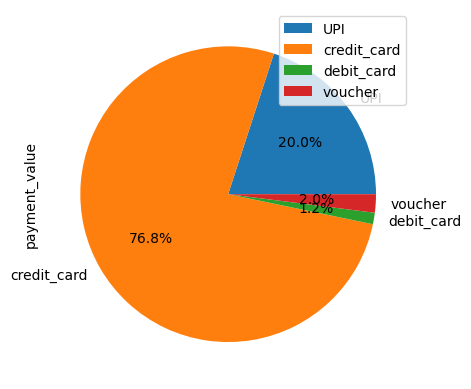

In [45]:
#sales trend by payment type
pd.pivot_table(merged_dataset , index = 'payment_type' , values = 'payment_value' , aggfunc = 'sum').plot(kind = 'pie' , x = 'payment_value' ,  autopct = "%1.1f%%",subplots = True)
plt.show()

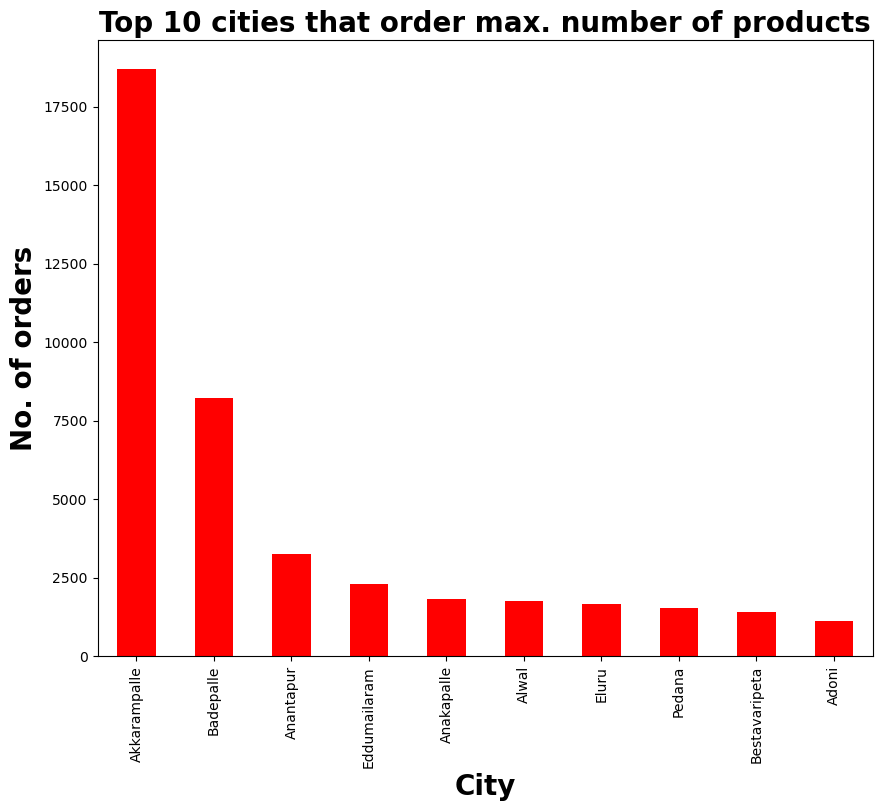

In [46]:
#top 10 cities on the basis of no. of orders
pd.pivot_table(merged_dataset , index = 'customer_city' , values = 'order_id' , aggfunc = 'count').sort_values('order_id' , ascending = False).head(10).plot(kind='bar',figsize=(10,8),color='red',legend=False)
plt.xlabel('City',fontweight = 'bold',fontsize='20')
plt.ylabel('No. of orders',fontweight = 'bold',fontsize='20')
plt.title('Top 10 cities that order max. number of products',fontweight = 'bold',fontsize='20')
plt.show()

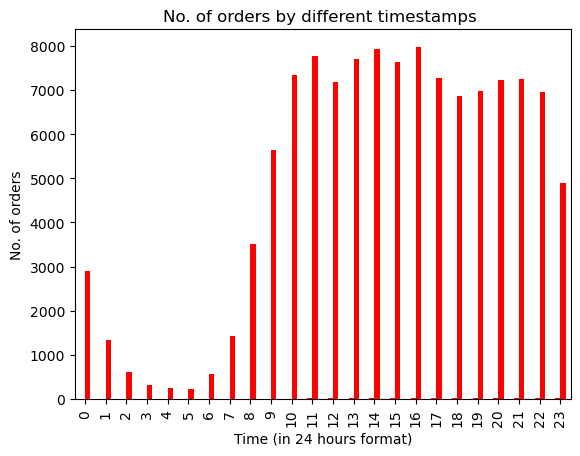

In [47]:
#peak ordering hours
a = merged_dataset[['order_id','order_purchase_timestamp']]
a.groupby(a.order_purchase_timestamp.dt.hour)['order_id'].count().reset_index().plot(kind = 'bar', color  = 'red',legend = False)
plt.ylabel('No. of orders')
plt.xlabel('Time (in 24 hours format)')
plt.title('No. of orders by different timestamps ')
plt.show()
# 10 AM to 10 PM are the peak hours

### f. Popular Products by month, seller, state, category. 

In [48]:
#popular products in different months
ques1f_month=merged_dataset[['pur_month','product_category_name', 'order_id']].groupby(['pur_month','product_category_name']).aggregate('count').reset_index()
ques1f_month=ques1f_month.sort_values(['pur_month','order_id' ], ascending=[True, False]).drop_duplicates('pur_month')
ques1f_month.rename(columns = {'order_id':'No. of orders'})

,pur_month,product_category_name,No. of orders
7,April,Bed_Bath_Table,1248
76,August,Bed_Bath_Table,1385
144,December,Bed_Bath_Table,738
213,February,Computers_Accessories,1126
270,January,Bed_Bath_Table,1203
339,July,Bed_Bath_Table,1412
407,June,Bed_Bath_Table,1345
473,March,Bed_Bath_Table,1368
541,May,Bed_Bath_Table,1366
608,November,Bed_Bath_Table,1166


In [49]:
#popular products of different sellers
ques1f_seller=merged_dataset[['seller_id','product_category_name', 'order_id']].groupby(['seller_id','product_category_name']).aggregate('count').reset_index()
ques1f_seller=ques1f_seller.sort_values(['seller_id','order_id' ], ascending=[True, False]).drop_duplicates('seller_id')
ques1f_seller.rename(columns = {'order_id':'No. of orders'}).sort_values('No. of orders' , ascending = False)

,seller_id,product_category_name,No. of orders
804,1f50f920176fa81dab994f9023523100,Garden_Tools,1958
1869,4a3ca9315b744ce9f8e9374361493884,Bed_Bath_Table,1703
2616,6560211a19b47992c3666cc44a7e94c0,Watches_Gifts,1695
5557,da8622b14eb17ae2831f4ac5b9dab84a,Bed_Bath_Table,1384
400,1025f0e2d44d7041d6cf58b6550e0bfa,Furniture_Decor,1334
...,...,...,...
3991,97e50a621f8e801f4baf69e08687c192,Toys,1
5622,dcb7367a92f5ffb89f1e2152ed260285,Signaling_And_Security,1
4879,bec568278124768c474ee90971ca94d1,Furniture_Decor,1
5625,dd264199fc8b687ad029de7de6d760e6,Auto,1


In [50]:
#popular products in different states
ques1f_state=merged_dataset[['geolocation_state_cust','product_category_name', 'order_id']].groupby(['geolocation_state_cust','product_category_name']).aggregate('count').reset_index()
ques1f_state=ques1f_state.sort_values(['geolocation_state_cust','order_id' ], ascending=[True, False]).drop_duplicates('geolocation_state_cust')
ques1f_state.rename(columns = {'order_id':'No. of orders'}).sort_values('No. of orders' , ascending = False)

,geolocation_state_cust,product_category_name,No. of orders
7,Andhra Pradesh,Bed_Bath_Table,9135
270,Gujarat,Bed_Bath_Table,868
131,Chhattisgarh,Bed_Bath_Table,786
500,Karnataka,Bed_Bath_Table,446
619,Madhya Pradesh,Bed_Bath_Table,368
198,Delhi,Bed_Bath_Table,348
337,Haryana,Bed_Bath_Table,314
684,Maharashtra,Bed_Bath_Table,244
892,Tamil Nadu,Bed_Bath_Table,228
444,Jammu & Kashmir,Bed_Bath_Table,194


In [51]:
#popular products by category
pd.pivot_table(merged_dataset , index = 'product_category_name' , values = 'order_id' , aggfunc = 'count').rename(columns = {'order_id':'No. of orders'}).sort_values('No. of orders' , ascending = False)

,No. of orders
product_category_name,
Bed_Bath_Table,13689
Health_Beauty,10000
Sports_Leisure,8988
Furniture_Decor,8813
Computers_Accessories,8121
...,...
Arts_And_Craftmanship,24
La_Cuisine,16
Cds_Dvds_Musicals,14


### g. Popular categories by state, month 

In [52]:
pd.pivot_table(merged_dataset,index = ['geolocation_state_cust','pur_month'] ,columns='product_category_name' ,values = 'order_id' , aggfunc='count')

product_category_name             Agro_Industry_And_Commerce  \
geolocation_state_cust pur_month                               
Andhra Pradesh         April                             6.0   
                       August                           12.0   
                       December                          6.0   
                       February                         46.0   
                       January                          11.0   
...                                                      ...   
West Bengal            March                             NaN   
                       May                               NaN   
                       November                          NaN   
                       October                           NaN   
                       September                         NaN   

product_category_name             Air_Conditioning   Art  \
geolocation_state_cust pur_month                           
Andhra Pradesh         April                  28.0  19.0   
                       August                 26.0  16.0   
                       December                3.0   1.0   
                       February               17.0   9.0   
                       January                25.0  15.0   
...                                            ...   ...   
West Bengal            March                   NaN   NaN   
                       May                     NaN   NaN   
                       November                NaN   NaN   
                       October                 NaN   NaN   
                       September               NaN   NaN   

product_category_name             Arts_And_Craftmanship  Audio   Auto   Baby  \
geolocation_state_cust pur_month                                               
Andhra Pradesh         April                        1.0   24.0  285.0  171.0   
                       August                       7.0   32.0  321.0  240.0   
                       December                     NaN   14.0  163.0   93.0   
                       February                     NaN   12.0  249.0  128.0   
                       January                      NaN   19.0  171.0  176.0   
...                                                 ...    ...    ...    ...   
West Bengal            March                        NaN    NaN    1.0    1.0   
                       May                          NaN    NaN    2.0    NaN   
                       November                     NaN    NaN    2.0    1.0   
                       October                      NaN    NaN    NaN    NaN   
                       September                    NaN    NaN    NaN    2.0   

product_category_name             Bed_Bath_Table  Books_General_Interest  \
geolocation_state_cust pur_month                                           
Andhra Pradesh         April               820.0                    41.0   
                       August              963.0                    44.0   
                       December            526.0                    20.0   
                       February            722.0                    28.0   
                       January             774.0                    15.0   
...                                          ...                     ...   
West Bengal            March                 4.0                     NaN   
                       May                   4.0                     NaN   
                       November              2.0                     NaN   
                       October               2.0                     NaN   
                       September             1.0                     NaN   

product_category_name             Books_Imported  ...  Security_And_Services  \
geolocation_state_cust pur_month                  ...                          
Andhra Pradesh         April                 4.0  ...                    NaN   
                       August                1.0  ...                    NaN   
                       December     

### h. List top 10 most expensive products sorted by price 

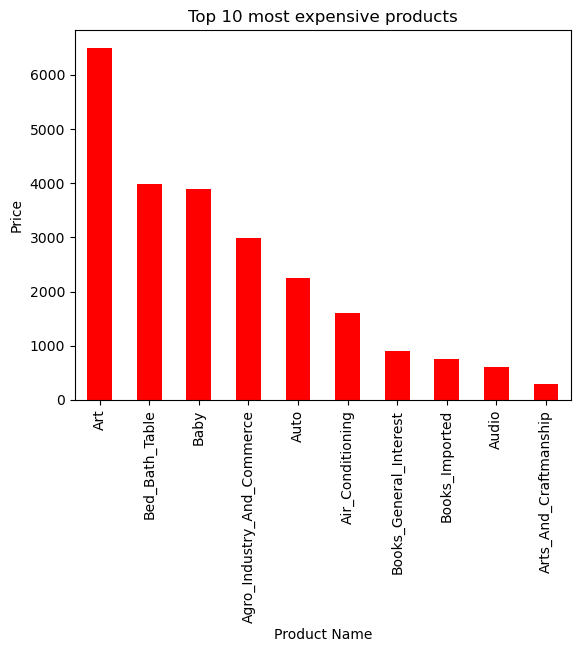

In [53]:
pd.pivot_table(merged_dataset , index = 'product_category_name' , values = 'price' ,aggfunc = 'max').head(10).sort_values('price' , ascending = False).plot(kind = 'bar' , color = 'red' , legend = False)
plt.xlabel('Product Name')
plt.ylabel('Price')
plt.title('Top 10 most expensive products')
plt.show()

### 2. Performing Customers/sellers Segmentation 
### a. Divide the customers into groups based on the revenue generated  

In [54]:
cust_sales = pd.DataFrame(merged_dataset.groupby('customer_unique_id')['payment_value'].sum())
median = cust_sales.quantile(0.5).values[0]
Q1 = cust_sales.quantile(0.25).values[0]
Q3 = cust_sales.quantile(0.75).values[0]
iqr = Q3 - Q1

In [55]:
lower_fence = (Q1 - (1.5*iqr))
higher_fence = (Q3 + (1.5*iqr))
print('The lower fence is:',lower_fence)
print('The higher fence is', higher_fence)
print('The median is', median)

The lower fence is: -145.25000000000003
The higher fence is 412.43000000000006
The median is 113.22


In [56]:
cust_sales['Customer_Group'] = pd.cut(cust_sales['payment_value'],bins=[lower_fence,Q1,Q3,higher_fence,
            float('inf')],labels=['Low','Medium','High','Outliers'])
cust_sales

,payment_value,Customer_Group
customer_unique_id,,
0000366f3b9a7992bf8c76cfdf3221e2,141.90,Medium
0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,Low
0000f46a3911fa3c0805444483337064,86.22,Medium
0000f6ccb0745a6a4b88665a16c9f078,43.62,Low
0004aac84e0df4da2b147fca70cf8255,196.89,Medium
...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,4134.84,Outliers
fffea47cd6d3cc0a88bd621562a9d061,84.58,Medium
ffff371b4d645b6ecea244b27531430a,112.46,Medium


In [57]:
a = pd.pivot_table(cust_sales,index = 'Customer_Group' , values = 'payment_value' , aggfunc = 'count').rename(columns={'payment_value':'Cust_count'}).sort_values('Cust_count',ascending=False)
a

,Cust_count
Customer_Group,
Medium,47474
Low,23741
High,14427
Outliers,9311


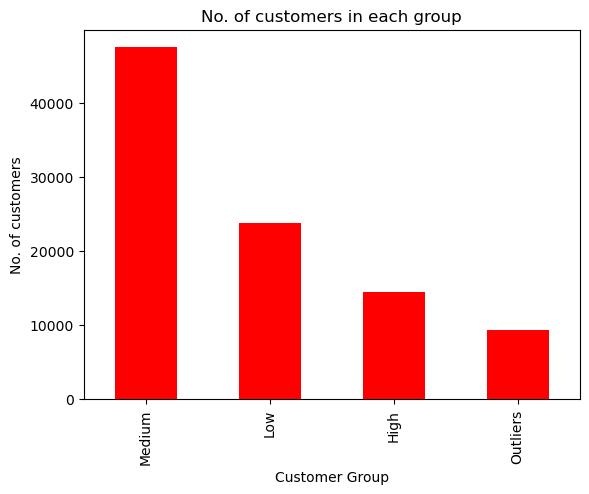

In [58]:
a.plot(kind = 'bar' , color = 'red' , legend = False)
plt.xlabel('Customer Group')
plt.ylabel('No. of customers')
plt.title('No. of customers in each group')
plt.show() 

### b. Divide the sellers into groups based on the revenue generated 

In [59]:
seller_revenue = pd.DataFrame(merged_dataset.groupby('seller_id')['price'].sum()).rename(columns={'price':'Seller Revenue'})
seller_revenue

,Seller Revenue
seller_id,
0015a82c2db000af6aaaf3ae2ecb0532,2685.00
001cca7ae9ae17fb1caed9dfb1094831,25248.93
001e6ad469a905060d959994f1b41e4f,250.00
002100f778ceb8431b7a1020ff7ab48f,1303.10
003554e2dce176b5555353e4f3555ac8,120.00
...,...
ffcfefa19b08742c5d315f2791395ee5,69.90
ffdd9f82b9a447f6f8d4b91554cc7dd3,2140.80
ffeee66ac5d5a62fe688b9d26f83f534,1839.86


In [60]:
Q1 = seller_revenue.quantile(0.25).values[0]
Q3 = seller_revenue.quantile(0.75).values[0]
median = seller_revenue.quantile(0.5).values[0]
iqr = Q3 - Q1
lower_fence = Q1 - (1.5*iqr)
upper_fence = Q3 + (1.5*iqr)

In [61]:
seller_revenue['Seller_Group'] = pd.cut(seller_revenue['Seller Revenue'],bins=[lower_fence,Q1,Q3,upper_fence,float('inf')],
      labels=['Low','Medium','High','Outliers'])

In [62]:
b = pd.pivot_table(seller_revenue,index = 'Seller_Group' , values = 'Seller Revenue' , aggfunc = 'count').rename(columns={'Seller Revenue':'Seller_count'}).sort_values('Seller_count',ascending=False)
b

,Seller_count
Seller_Group,
Medium,1544
Low,772
High,403
Outliers,369


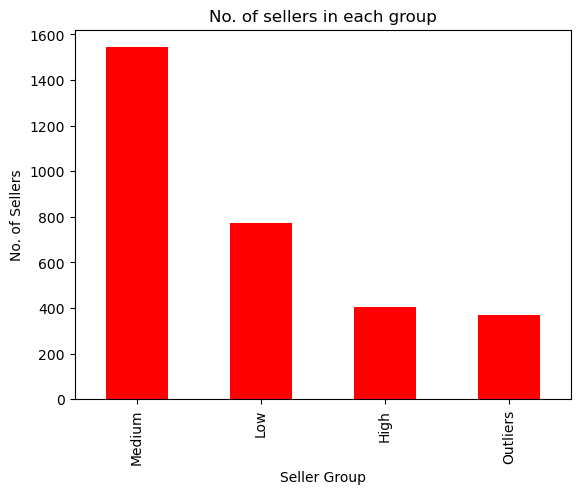

In [63]:
b.plot(kind = 'bar' , color = 'red' , legend = False)
plt.xlabel('Seller Group')
plt.ylabel('No. of Sellers')
plt.title('No. of sellers in each group')
plt.show() 

### 3. Cross-Selling (Which products are selling together) 
Hint: We need to find which of the top 10 combinations of products are selling together in 
each transaction.  (combination of 2 or 3 buying together) 

In [64]:
import itertools

# Step 1: Filter the necessary columns
df1 = merged_dataset[['order_id', 'product_id']]

# Step 2: Group the data by order_id
grouped_data = df1.groupby('order_id')['product_id'].apply(list)

# Step 3: Generate all possible combinations of 2 or 3 products for each order
combinations = []
for products in grouped_data:
    if len(products) >= 2:
        combos = itertools.chain.from_iterable(
            itertools.combinations(products, r) for r in range(2, min(4, len(products) + 1)))
        combinations.extend(combos)

# Step 4: Count the frequency of each combination
combo_count = {}
for combo in combinations:
    combo = tuple(sorted(combo))
    combo_count[combo] = combo_count.get(combo, 0) + 1

# Step 5: Sort the combinations by frequency and return the top 10
top_combinations_prod_id = sorted(combo_count.items(), key=lambda x: x[1], reverse=True)[:10]
top_combinations_prod_id

[(('5ddab10d5e0a23acb99acf56b62b3276',
   'ebf9bc6cd600eadd681384e3116fda85',
   'ebf9bc6cd600eadd681384e3116fda85'),
  18081),
 (('ebf9bc6cd600eadd681384e3116fda85',
   'ebf9bc6cd600eadd681384e3116fda85',
   'ebf9bc6cd600eadd681384e3116fda85'),
  11480),
 (('5ddab10d5e0a23acb99acf56b62b3276',
   '5ddab10d5e0a23acb99acf56b62b3276',
   'ebf9bc6cd600eadd681384e3116fda85'),
  8820),
 (('0554911df28fda9fd668ce5ba5949695',
   '0554911df28fda9fd668ce5ba5949695',
   '0554911df28fda9fd668ce5ba5949695'),
  8436),
 (('1aecdb5fa3add74e385f25c6c527a462',
   '1aecdb5fa3add74e385f25c6c527a462',
   '1aecdb5fa3add74e385f25c6c527a462'),
  3654),
 (('8d37ee446981d3790967d0268d6cfc81',
   '8d37ee446981d3790967d0268d6cfc81',
   '8d37ee446981d3790967d0268d6cfc81'),
  2600),
 (('11250b0d4b709fee92441c5f34122aed',
   '11250b0d4b709fee92441c5f34122aed',
   '11250b0d4b709fee92441c5f34122aed'),
  2024),
 (('eea3e07f864a0a1389726d8a5f31c3f6',
   'eea3e07f864a0a1389726d8a5f31c3f6',
   'eea3e07f864a0a1389726d8a5f3

### 4. Payment Behaviour 
### a. How customers are paying?

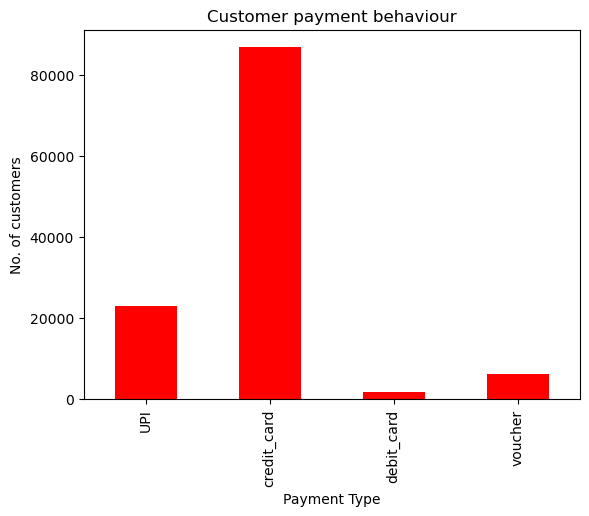

In [65]:
pd.pivot_table(merged_dataset , index = 'payment_type' , values = 'order_id' , aggfunc = 'count').rename(columns={'order_id':'No. of customers'}).plot(kind = 'bar' , color = 'red' , legend = False)
plt.xlabel('Payment Type')
plt.ylabel('No. of customers')
plt.title('Customer payment behaviour')
plt.show() 

### b. Which payment channels are used by most customers?

In [66]:
amount_paid = pd.pivot_table(merged_dataset , index = 'payment_type' , values = 'payment_value' , aggfunc = 'sum')
amount_paid

,payment_value
payment_type,
UPI,4062916.93
credit_card,15596946.66
debit_card,253876.49
voucher,407573.61


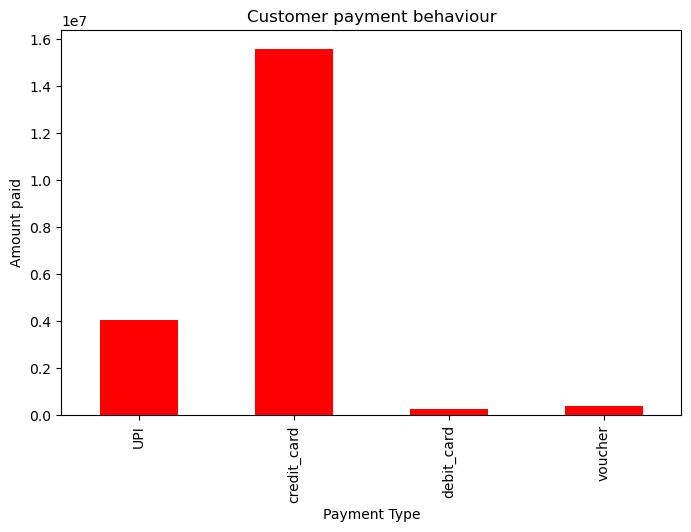

In [67]:
amount_paid.plot(kind = 'bar' , color = 'red' , figsize = (8,5),legend = False)
plt.xlabel('Payment Type')
plt.ylabel('Amount paid')
plt.title('Customer payment behaviour')
plt.show() 

### 5. Customer satisfaction towards category & product 
### a. Which categories (top 10) are maximum rated & minimum rated? 

In [68]:
ratings = pd.pivot_table(merged_dataset , index = 'product_category_name' , values = 'review_score').sort_values('review_score' , ascending=False)
ratings_top_10 = ratings.head(10)
ratings_top_10

,review_score
product_category_name,
Cds_Dvds_Musicals,4.642857
Fashion_Childrens_Clothes,4.500000
Books_General_Interest,4.430851
Books_Imported,4.419355
Books_Technical,4.345588
Costruction_Tools_Tools,4.333333
Small_Appliances_Home_Oven_And_Coffee,4.320513
Food_Drink,4.312715
Luggage_Accessories,4.289905


In [69]:
ratings_bottom_10 = ratings.tail(10)
ratings_bottom_10

,review_score
product_category_name,
Furniture_Living_Room,3.828390
Audio,3.823684
Furniture_Mattress_And_Upholstery,3.804878
Fashio_Female_Clothing,3.780000
Fixed_Telephony,3.660517
Fashion_Male_Clothing,3.531034
Office_Furniture,3.516274
Home_Comfort_2,3.387097
Diapers_And_Hygiene,3.256410


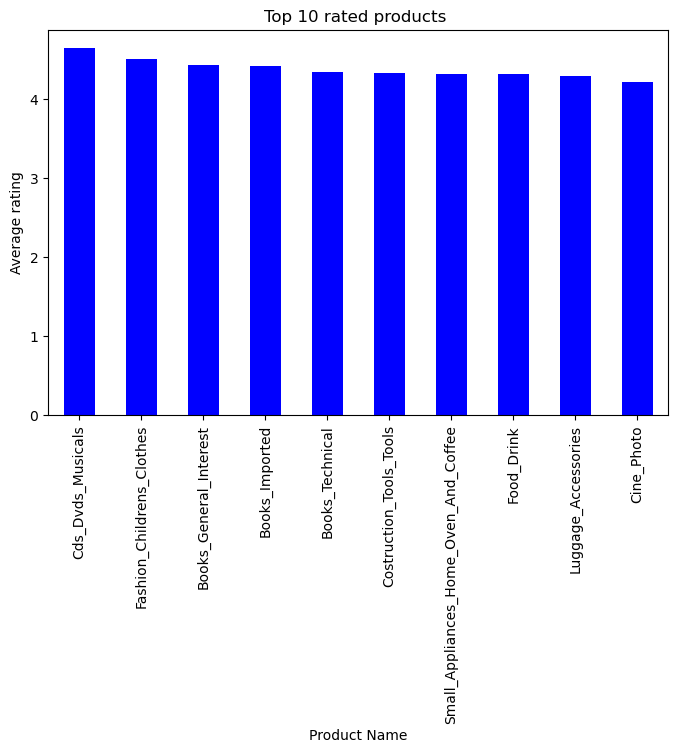

In [70]:
ratings_top_10.plot(kind = 'bar' , color = 'blue' , figsize = (8,5),legend = False)
plt.xlabel('Product Name')
plt.ylabel('Average rating')
plt.title('Top 10 rated products ')
plt.show() 

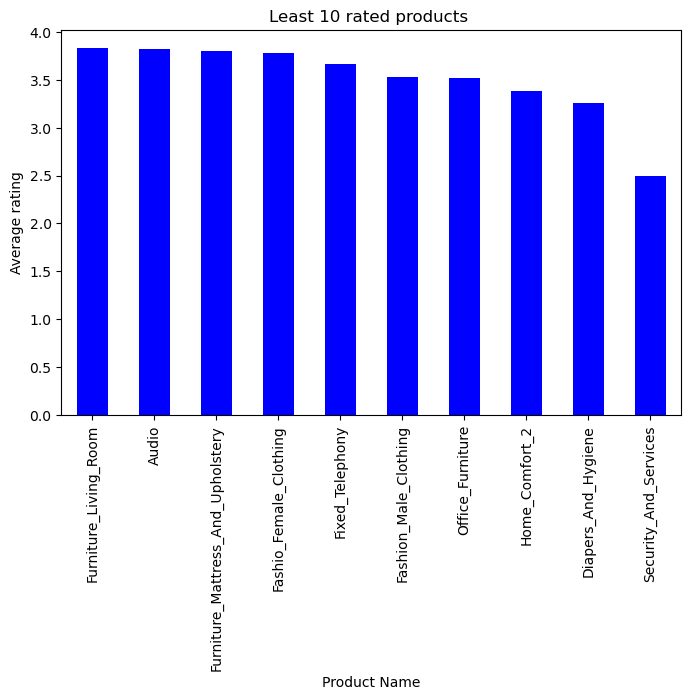

In [71]:
ratings_bottom_10.plot(kind = 'bar' , color = 'blue' , figsize = (8,5),legend = False)
plt.xlabel('Product Name')
plt.ylabel('Average rating')
plt.title('Least 10 rated products ')
plt.show() 

### b. Which products (top10) are maximum rated & minimum rated? 

In [72]:
top_10 = pd.pivot_table(merged_dataset , index = 'product_id'  ,values = 'review_score').sort_values('review_score',ascending=False).head(10)
top_10

,review_score
product_id,
00066f42aeeb9f3007548bb9d3f33c38,5.0
594bbf3064869810a9f56dac8c05acfb,5.0
5928c970e675d6fdf39abc0dfc431ee9,5.0
5929e483b6df44414c047cac38873fe6,5.0
c8f3af40bfb84b26b7d88c30a0760b27,5.0
c8f17c4ceaa05acfb30a852b8ee2c0a9,5.0
c8eca123751676bbdaaa9e4a84721362,5.0
c8eb5b2d7173db25ec9bfc54dcb4ccbb,5.0
97478538ef6ed323f4ed85e2139d4a24,5.0


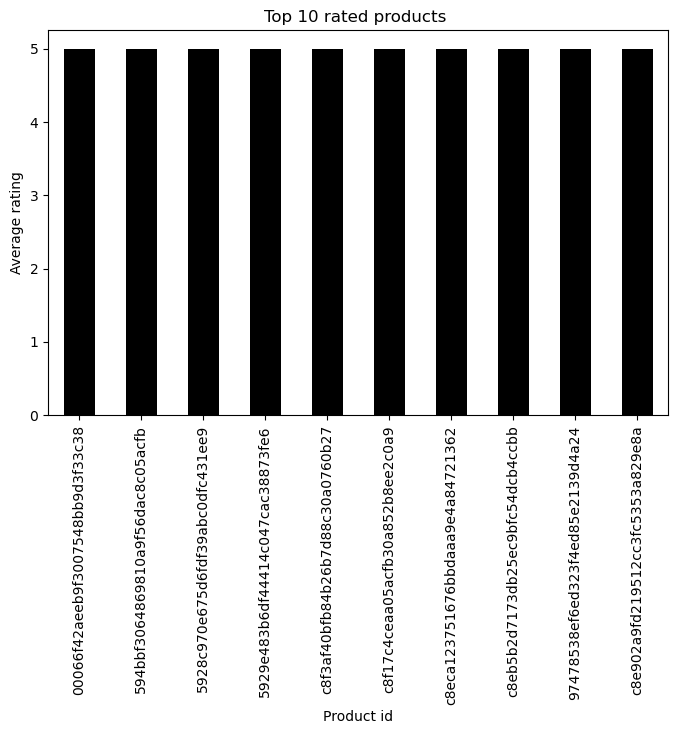

In [73]:
top_10.plot(kind = 'bar' , color = 'black' , figsize = (8,5),legend = False)
plt.xlabel('Product id')
plt.ylabel('Average rating')
plt.title('Top 10 rated products ')
plt.show() 

In [74]:
bottom_10 = pd.pivot_table(merged_dataset , index = 'product_id'  ,values = 'review_score').sort_values('review_score',ascending=False).tail(10)
bottom_10

,review_score
product_id,
567c45f86af8863b92fd65d77298a599,1.0
568d3a7903cd345508734bf75e72565f,1.0
5691a536d459e5cb326b7bedce928067,1.0
ca2dbc1e0b58b5ff03ed13e728ceddec,1.0
ca17b18b38db6e0d2c33d362322f2a06,1.0
ca165220cdeb3367ea870193baf4a7cd,1.0
ee8138bcca833152a19543702228ee26,1.0
56f96b94cbba67352e072d40e4e02167,1.0
1bdf131c83d68a290b1abe6b43f3c324,1.0


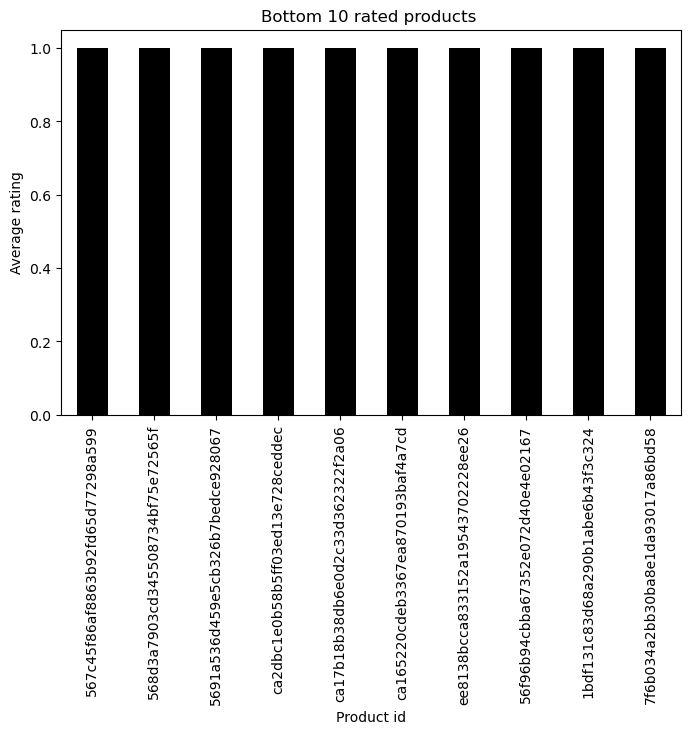

In [75]:
bottom_10.plot(kind = 'bar' , color = 'black' , figsize = (8,5),legend = False)
plt.xlabel('Product id')
plt.ylabel('Average rating')
plt.title('Bottom 10 rated products ')
plt.show() 

### c. Average rating by location, seller, product, category, month etc.

In [76]:
state_rating = pd.pivot_table(merged_dataset , index = 'geolocation_state_cust',values = 'review_score').sort_values('review_score',ascending=False)
state_rating

,review_score
geolocation_state_cust,
Goa,4.777778
Punjab,4.161290
Rajasthan,4.131455
Haryana,4.125701
Uttar Pradesh,4.123967
Tamil Nadu,4.115622
Orissa,4.088235
Maharashtra,4.080413
Kerala,4.060827


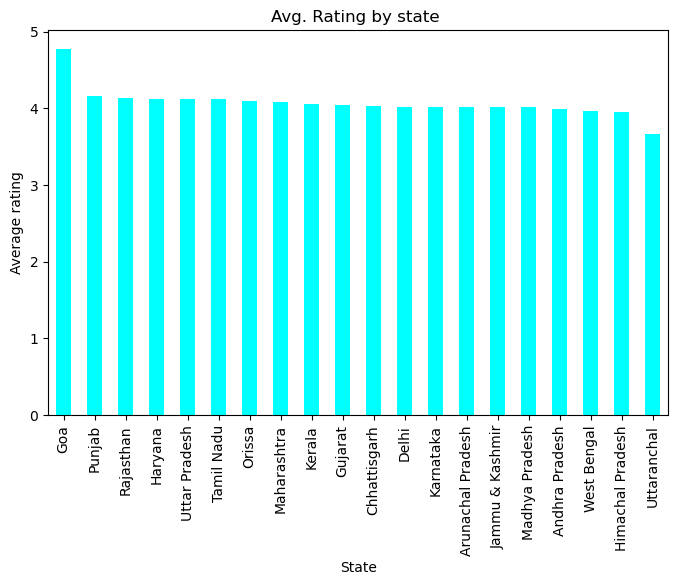

In [77]:
state_rating.plot(kind = 'bar' , color = 'aqua' , figsize = (8,5),legend = False)
plt.xlabel('State')
plt.ylabel('Average rating')
plt.title('Avg. Rating by state ')
plt.show() 

In [78]:
#Average rating by seller
seller_rating = pd.pivot_table(merged_dataset , index = 'seller_id',values = 'review_score').sort_values('review_score',ascending=False)
seller_rating

,review_score
seller_id,
c18309219e789960add0b2255ca4b091,5.0
9b76ad3d04236f76bc71c59470305e13,5.0
ede2977fbaf3738583170735ca403f6c,5.0
edd066cd02126d7800f9b66e980e9931,5.0
9d213f303afae4983637247556438ede,5.0
...,...
f5403d3f50089112c4eed37928b7f622,1.0
749e7cdabbaf72f16677859e27874ba5,1.0
dadc51ef321949ec9a3ab25cd902e23d,1.0


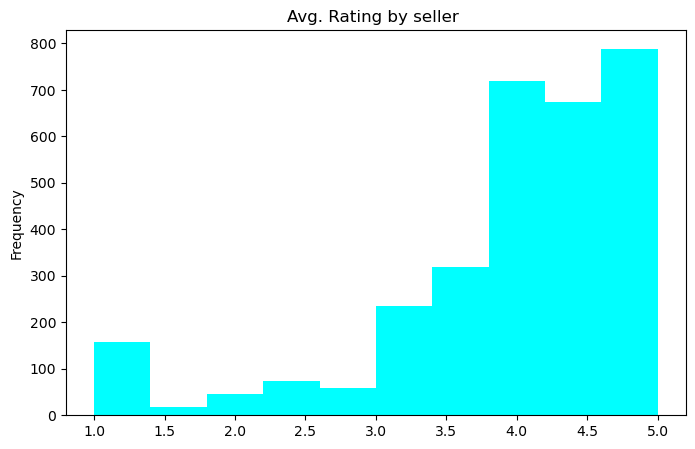

In [79]:
seller_rating.plot(kind = 'hist' , color = 'aqua' , figsize = (8,5),legend = False)
plt.title('Avg. Rating by seller ')
plt.show() 

In [80]:
#Avg. rating by product
product_rating = pd.pivot_table(merged_dataset , index = 'product_id',values = 'review_score').sort_values('review_score',ascending=False)
product_rating

,review_score
product_id,
00066f42aeeb9f3007548bb9d3f33c38,5.0
594bbf3064869810a9f56dac8c05acfb,5.0
5928c970e675d6fdf39abc0dfc431ee9,5.0
5929e483b6df44414c047cac38873fe6,5.0
c8f3af40bfb84b26b7d88c30a0760b27,5.0
...,...
ca165220cdeb3367ea870193baf4a7cd,1.0
ee8138bcca833152a19543702228ee26,1.0
56f96b94cbba67352e072d40e4e02167,1.0


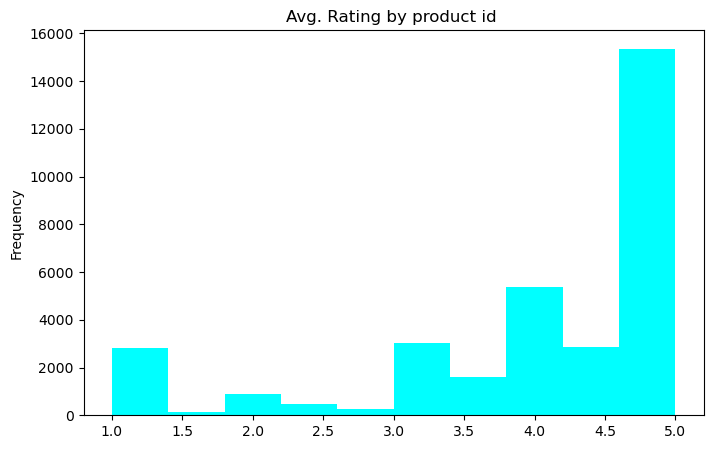

In [81]:
product_rating.plot(kind = 'hist' , color = 'aqua' , figsize = (8,5),legend = False)
plt.title('Avg. Rating by product id ')
plt.show() 

In [82]:
#Avg. rating by product category
category_rating = pd.pivot_table(merged_dataset , index = 'product_category_name',values = 'review_score').sort_values('review_score',ascending=False)
category_rating

,review_score
product_category_name,
Cds_Dvds_Musicals,4.642857
Fashion_Childrens_Clothes,4.500000
Books_General_Interest,4.430851
Books_Imported,4.419355
Books_Technical,4.345588
...,...
Fashion_Male_Clothing,3.531034
Office_Furniture,3.516274
Home_Comfort_2,3.387097


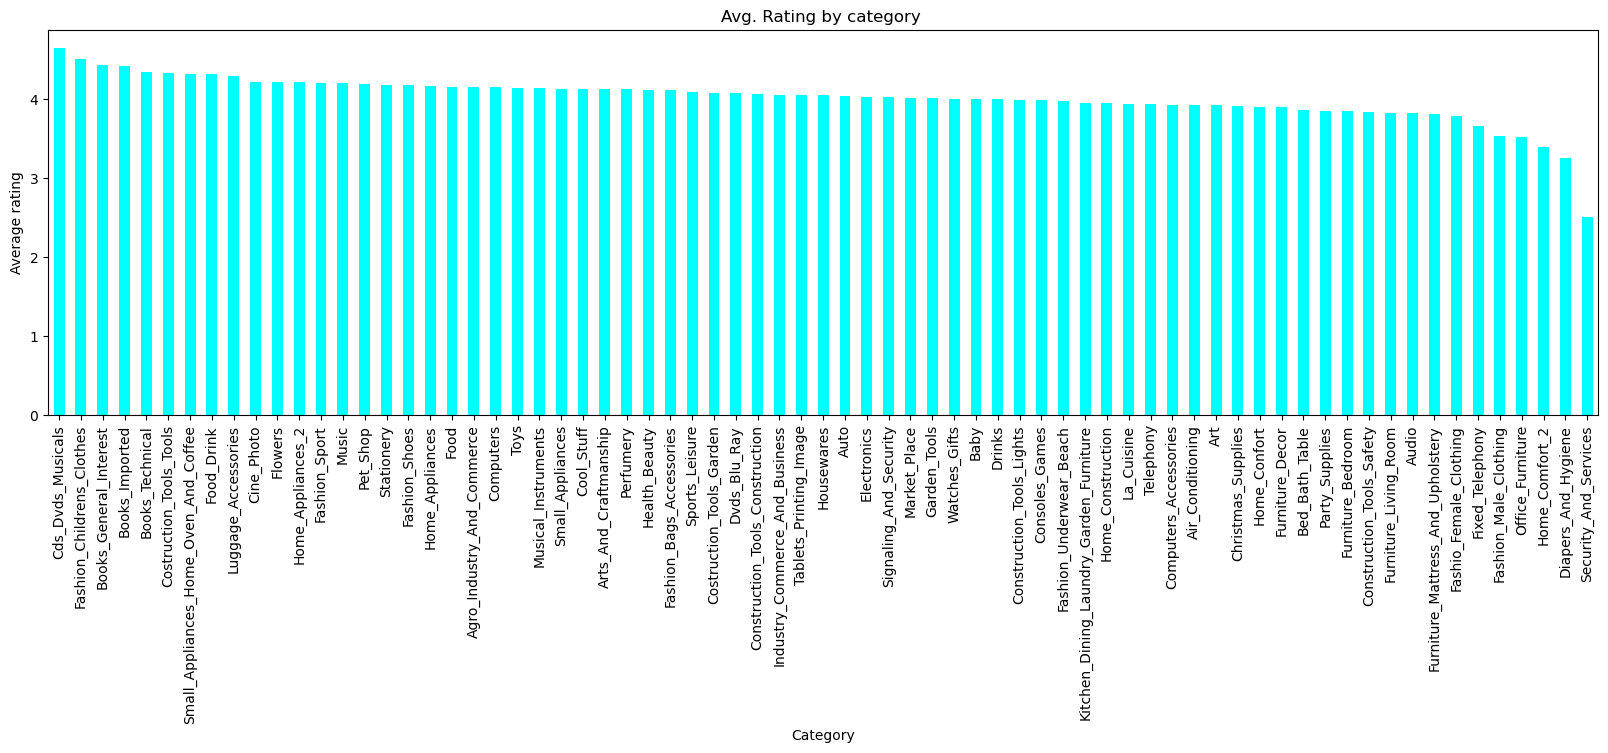

In [83]:
category_rating.plot(kind = 'bar' , color = 'aqua' , figsize = (20,5),legend = False)
plt.xlabel('Category')
plt.ylabel('Average rating')
plt.title('Avg. Rating by category ')
plt.show() 

In [84]:
#Avg. rating by purchasse month
month_rating =pd.pivot_table(merged_dataset , index = 'pur_month',values = 'review_score').sort_values('review_score',ascending=False)
month_rating

,review_score
pur_month,
August,4.205545
July,4.169469
June,4.155135
September,4.121994
May,4.119163
April,4.035556
October,4.011402
January,3.943778
December,3.926904


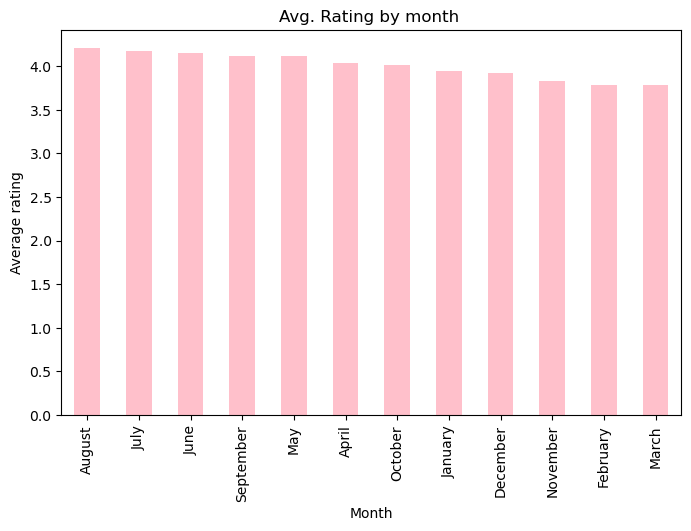

In [85]:
month_rating.plot(kind = 'bar' , color = 'pink' , figsize = (8,5),legend = False)
plt.xlabel('Month')
plt.ylabel('Average rating')
plt.title('Avg. Rating by month ')
plt.show() 

In [87]:
#Avg. rating by purchasse year
year_rating =pd.pivot_table(merged_dataset , index = 'pur_year',values = 'review_score').sort_values('review_score',ascending=False)
year_rating

,review_score
pur_year,
2017,4.029130
2018,4.004776
2016,3.569231


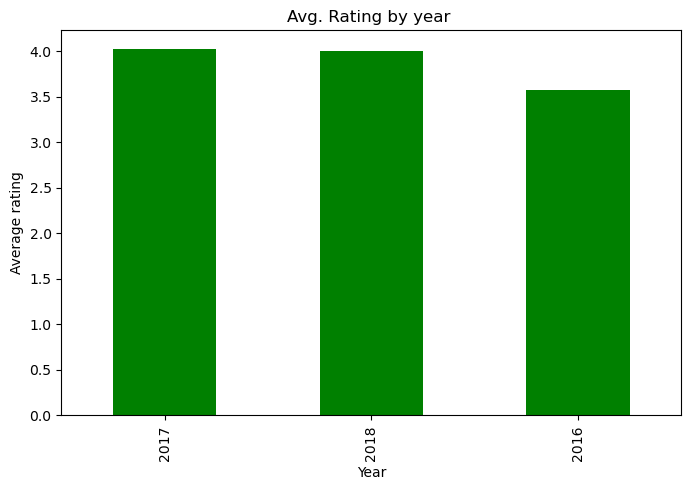

In [88]:
year_rating.plot(kind = 'bar' , color = 'green' , figsize = (8,5),legend = False)
plt.xlabel('Year')
plt.ylabel('Average rating')
plt.title('Avg. Rating by year ')
plt.show() 